In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib_venn import venn2, venn3, venn3_circles, venn2_circles
from sklearn.cluster import KMeans

In [45]:
df = pd.read_csv("/content/datamatdis_imupp1.csv")
df

,Nama,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,1,Menengah,Proyek pribadi,30 menit - 1 jam,> 10 Kali,4,4,3,5,3,4,3,4,Mengunggah data → Analisis data → Simpan hasil,Menulis / memperbaiki kode
1,2,Pemula,Tugas Kuliah,30 menit - 1 jam,≤ 5 Kali,3,3,3,5,3,3,2,4,Menulis kode → Menjalankan program → Debugging,Menulis / memperbaiki kode
2,3,Menengah,Tugas Kuliah,> 2 jam,> 10 Kali,5,4,1,5,4,4,4,4,Menulis kode → Error → Minta bantuan AI,Menjalankan program
3,4,Menengah,Tugas Kuliah,> 2 jam,> 10 Kali,5,5,1,5,5,5,5,5,Menulis kode → Error → Minta bantuan AI,Menulis / memperbaiki kode
4,5,Pemula,Tugas Kuliah,> 2 jam,> 10 Kali,5,5,3,5,4,2,3,5,Menulis kode → Error → Minta bantuan AI,Menjalankan program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,Menengah,Tugas Kuliah,1 - 2 jam,≤ 5 Kali,3,3,3,3,3,3,3,3,Meminta syntax AI → Menulis kode → Menjalankan...,Menulis / memperbaiki kode
105,106,Menengah,Tugas Kuliah,1 - 2 jam,> 10 Kali,5,5,2,3,4,4,4,4,Meminta syntax AI → Menulis kode → Menjalankan...,Menjalankan program
106,107,Pemula,Tugas Kuliah,> 2 jam,≤ 5 Kali,3,5,2,4,4,3,4,4,Mengunggah data → Analisis data → Simpan hasil,Menulis / memperbaiki kode
107,108,Pemula,Tugas Kuliah,> 2 jam,≤ 5 Kali,2,5,1,3,5,4,5,5,Meminta syntax AI → Menulis kode → Menjalankan...,Menjalankan program


Penjelasan beberapa variabel dataset:

X1: Status Pemrograman

X2: Jenis kegiatan menggunakan aplikasi untuk coding

X3: "Rata-rata waktu memakai aplikasi coding dalam sehari? (Visual Studio Code, Google Colab, etc)"

X4: "Berapa kali kamu menggunakan aplikasi coding? (Visual Studio Code, Google Colab, etc)"

X5: Berapa kali kamu mengunggah data kedalam aplikasi coding?

X6: Berapa kali kamu menganalisis data atau menjalankan program analisis?

X7: Berapa kali kamu menulis atau memperbarui kode tanpa bantuan AI?

X8: Berapa kali kamu menjalankan atau menguji program (run/execute)?

X9: Berapa kali kamu meminta syntax atau potongan kode kepada AI?

X10: Berapa kali kamu menyelesaikan error atau bug dengan bantuan AI?

X11: Berapa kali kamu melakukan prompting AI untuk mengerjakan tugas coding secara langsung?

X12: Berapa kali kamu meminta AI menjelaskan logika atau teori kode?

X13: Urutan aktivitas yang paling sering kamu lakukan saat coding (pilih satu):

X14: "Setelah kamu menggunakan AI, aktivitas berikutnya yang paling sering kamu lakukan adalah:"

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    109 non-null    int64 
 1   X1      109 non-null    object
 2   X2      109 non-null    object
 3   X3      109 non-null    object
 4   X4      109 non-null    object
 5   X5      109 non-null    int64 
 6   X6      109 non-null    int64 
 7   X7      109 non-null    int64 
 8   X8      109 non-null    int64 
 9   X9      109 non-null    int64 
 10  X10     109 non-null    int64 
 11  X11     109 non-null    int64 
 12  X12     109 non-null    int64 
 13  X13     109 non-null    object
 14  X14     109 non-null    object
dtypes: int64(9), object(6)
memory usage: 12.9+ KB


In [47]:
df.describe()

,Nama,X5,X6,X7,X8,X9,X10,X11,X12
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.000000,3.834862,3.844037,2.587156,4.229358,4.091743,4.036697,3.743119,4.119266
std,31.609598,1.182541,1.139967,1.073339,0.968323,0.799783,0.891592,0.946765,0.889494
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,28.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000
50%,55.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000
75%,82.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,109.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Hasil statistik deskriptif menunjukkan bahwa sebagian besar variabel (X5, X6, X8, X9, X10, X11, dan X12) berada pada kategori tinggi dengan nilai rata-rata di atas 3.7, yang berarti responden cenderung memberikan penilaian positif terhadap aspek-aspek yang diukur. Variabel X8, X9, dan X12 memiliki rata-rata tertinggi, sehingga dapat disimpulkan bahwa ketiga aspek tersebut paling dominan dan konsisten dinilai tinggi oleh responden. Sebaliknya, X7 memiliki rata-rata terendah, yaitu 2.59, menunjukkan bahwa aktivitas atau persepsi pada dimensi ini relatif rendah dibandingkan variabel lainnya. Selain itu, variabilitas jawaban paling besar terlihat pada X5 dan X6, yang menunjukkan keragaman pendapat responden, sedangkan X9 memiliki variabilitas paling kecil, mencerminkan konsistensi penilaian antar responden.

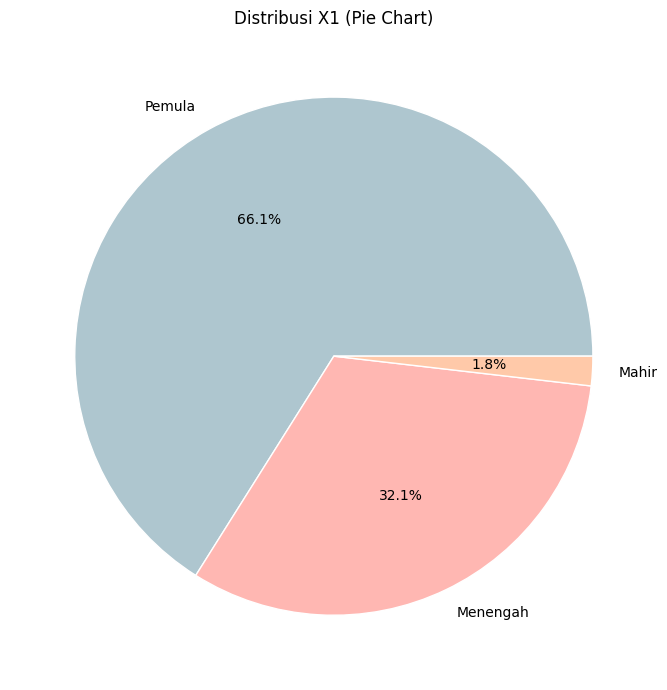

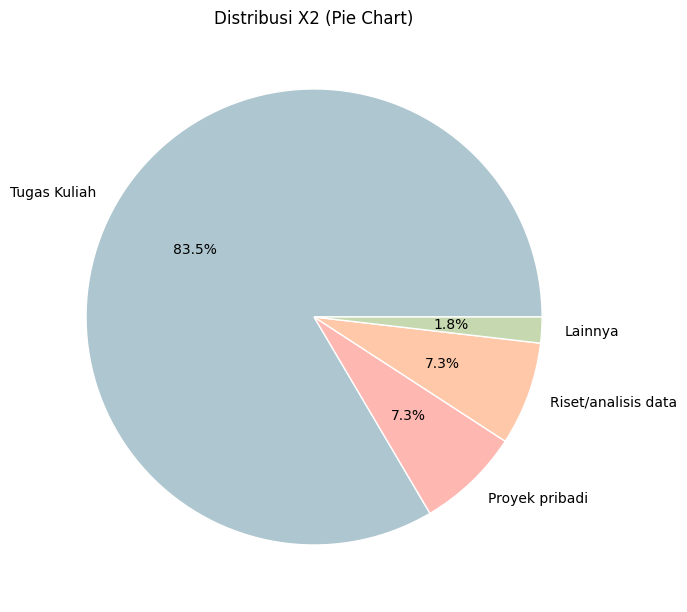

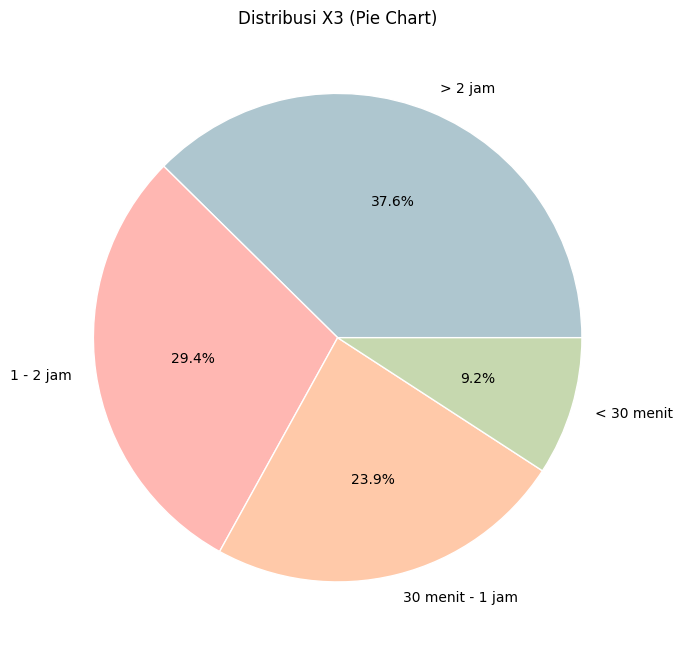

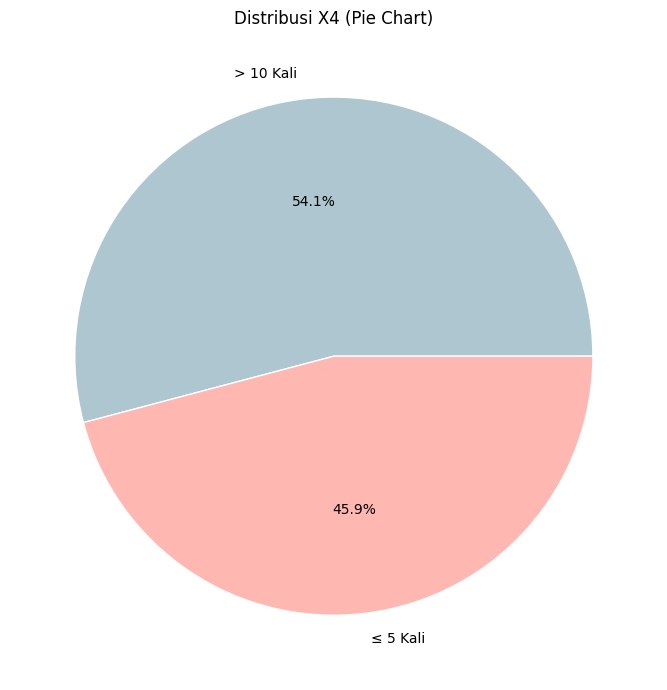

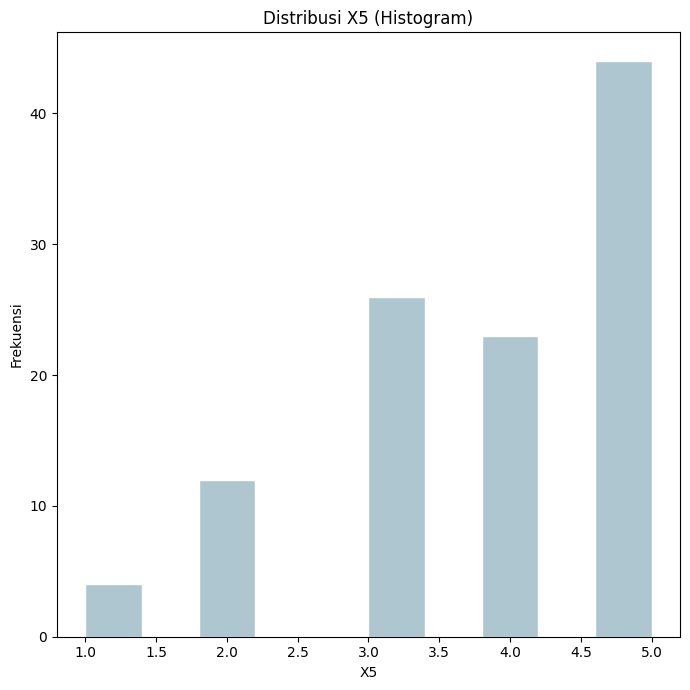

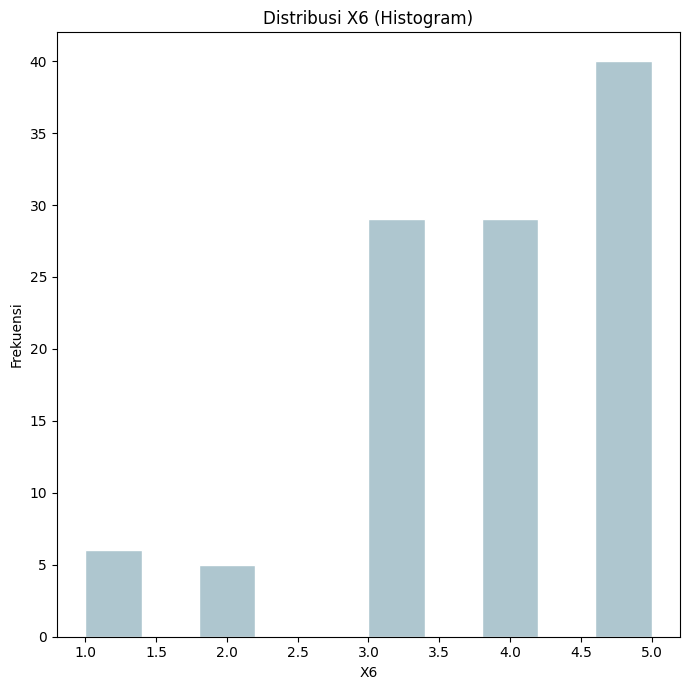

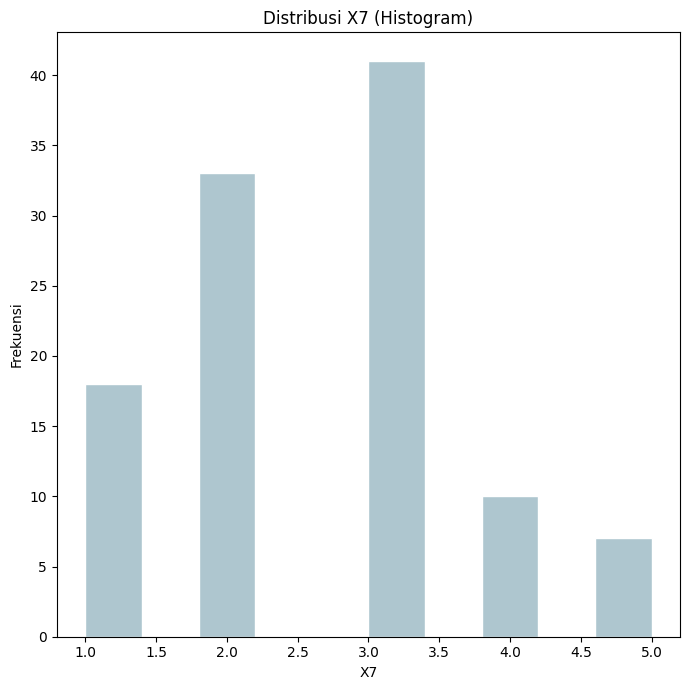

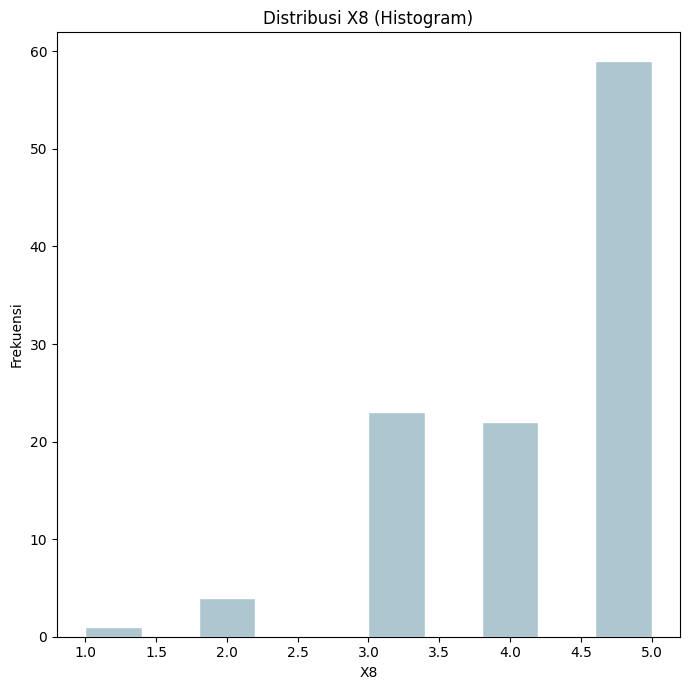

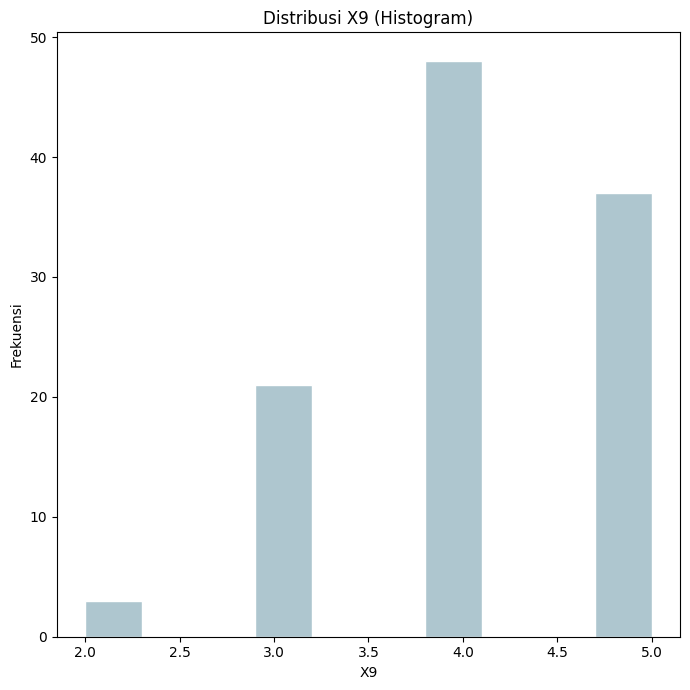

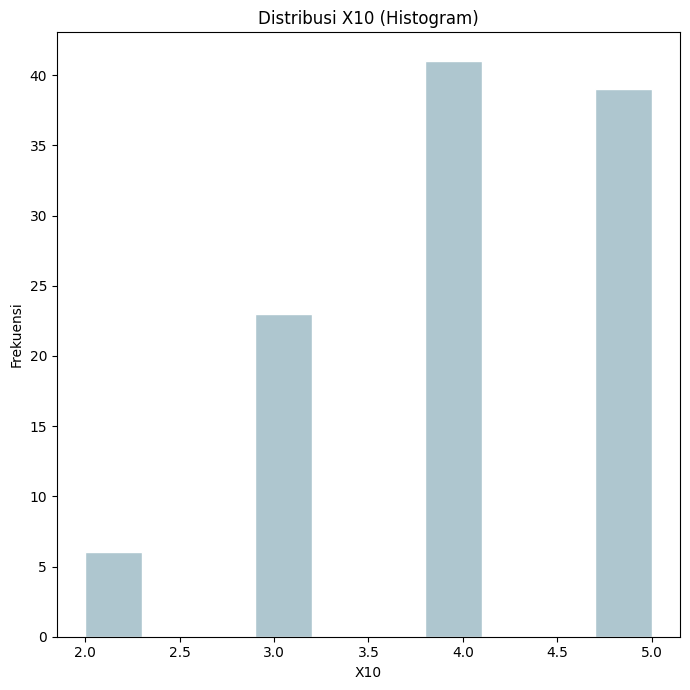

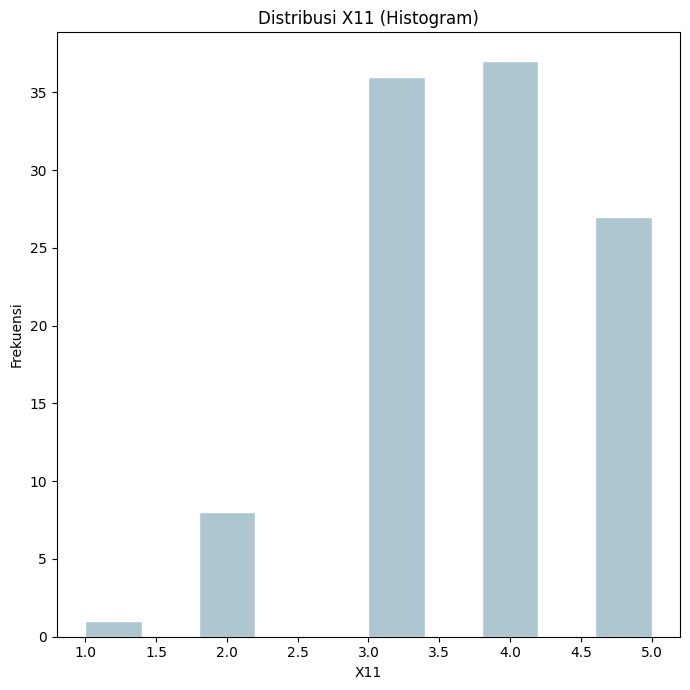

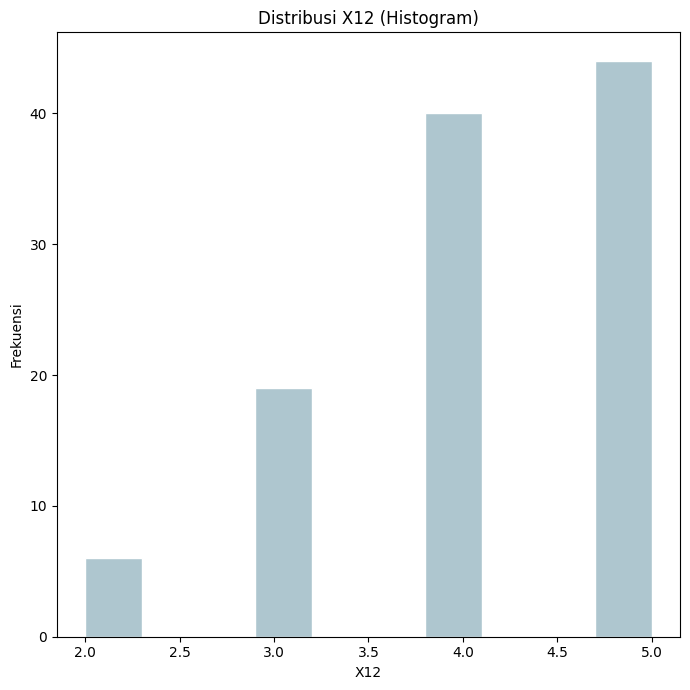

/tmp/ipython-input-3612157110.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


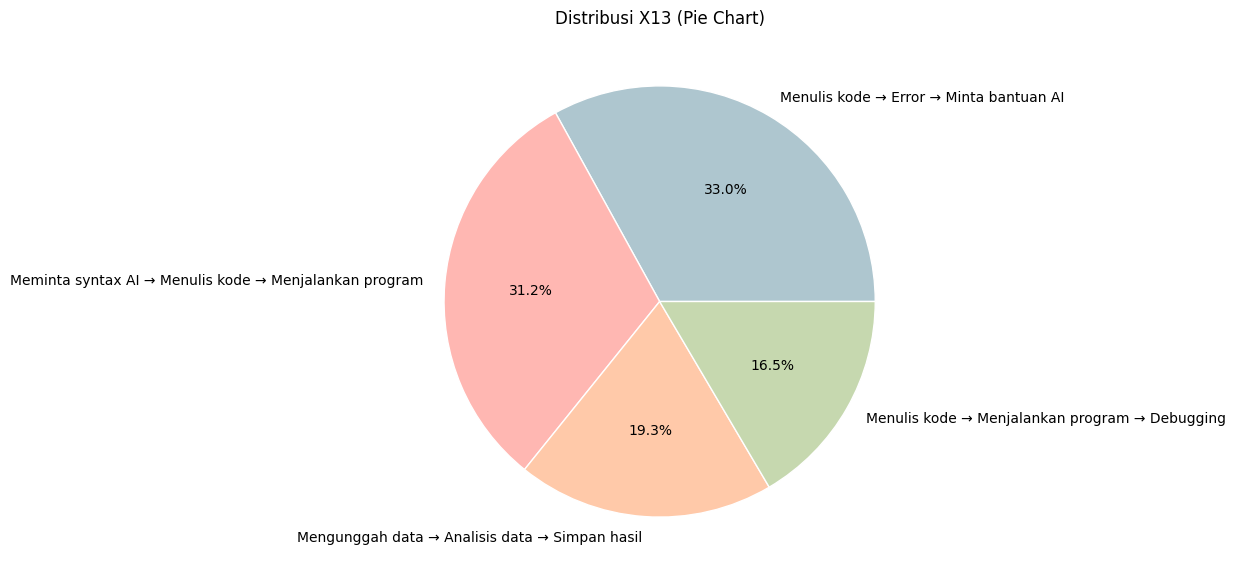

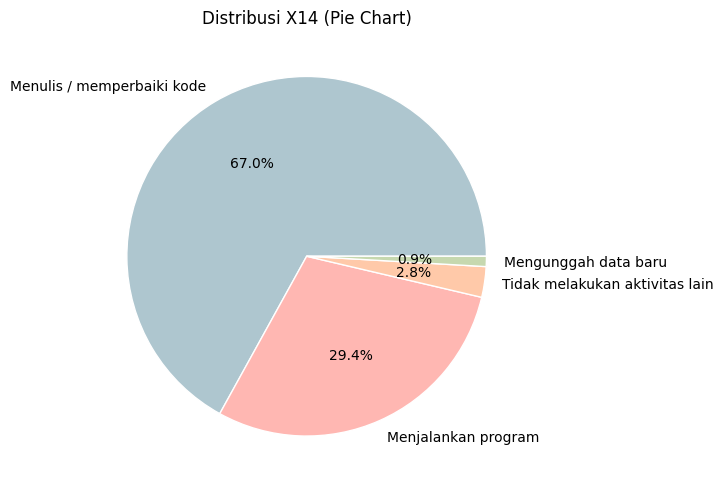

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Warna pastel serasi (konsisten dipakai semua chart)
pastel_palette = [
    "#AEC6CF",  # pastel blue
    "#FFB7B2",  # pastel pink
    "#FFC9A9",  # pastel peach
    "#C6D8AF",  # pastel green
    "#D7BEF3",  # pastel purple
    "#FFF5BA",  # pastel yellow
    "#FFD8CB",  # pastel coral
    "#B5EAD7"   # pastel mint
]

variables = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14']

for var in variables:
    plt.figure(figsize=(7,7))

    # Jika kategorikal → PIE CHART
    if df[var].dtype == 'object':
        vc = df[var].value_counts()
        plt.pie(
            vc,
            labels=vc.index,
            autopct='%1.1f%%',
            colors=pastel_palette[:len(vc)],
            wedgeprops={"edgecolor": "white"}
        )
        plt.title(f"Distribusi {var} (Pie Chart)")

    # Jika numerik → HISTOGRAM
    else:
        plt.hist(
            df[var],
            bins=10,
            color=pastel_palette[0],
            edgecolor="white"
        )
        plt.title(f"Distribusi {var} (Histogram)")
        plt.xlabel(var)
        plt.ylabel("Frekuensi")

    plt.tight_layout()
    plt.show()


In [49]:
A_pemula = set(df[df['X1'] == 'Pemula']["Nama"])
A_menengah = set(df[df['X1'] == 'Menengah']["Nama"])
A_mahir = set(df[df['X1'] == 'Mahir']["Nama"])

print("=== HIMPUNAN STATUS PEMROGRAMAN ===")
print(f"Pemula   : {len(A_pemula)} orang -> {sorted(A_pemula)}")
print(f"Menengah : {len(A_menengah)} orang -> {sorted(A_menengah)}")
print(f"Mahir   : {len(A_mahir)} orang -> {sorted(A_mahir)}\n")

=== HIMPUNAN STATUS PEMROGRAMAN ===
Pemula   : 72 orang -> [2, 5, 6, 7, 8, 11, 12, 13, 15, 16, 17, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 65, 69, 71, 72, 75, 76, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 92, 93, 95, 96, 99, 100, 101, 107, 108]
Menengah : 35 orang -> [1, 3, 4, 9, 10, 18, 19, 29, 38, 39, 43, 44, 59, 60, 63, 64, 66, 67, 68, 70, 73, 74, 77, 85, 87, 91, 94, 97, 98, 102, 103, 104, 105, 106, 109]
Mahir   : 2 orang -> [14, 23]



Distribusi tingkat kemampuan pemrograman menunjukkan bahwa sebagian besar responden berada pada kategori Pemula, yaitu sebanyak 72 orang. Hal ini menegaskan bahwa mayoritas peserta masih dalam tahap awal pembelajaran dan eksplorasi dunia pemrograman. Kategori Menengah diisi oleh 35 responden, yang mencerminkan bahwa sekelompok signifikan telah memiliki pemahaman yang lebih mapan dan pengalaman penggunaan bahasa pemrograman secara lebih rutin. Sementara itu, hanya 2 responden yang berada pada kategori Mahir, menunjukkan bahwa proporsi individu dengan kompetensi tinggi masih sangat kecil dibandingkan keseluruhan populasi. Secara keseluruhan, distribusi ini menggambarkan bahwa mayoritas peserta masih berkembang menuju tingkat kemampuan yang lebih tinggi, dengan sedikit yang telah mencapai tingkat mahir.

In [50]:
x3_mapping = {
    '< 30 menit': 1,
    '30 menit - 1 jam': 2,
    '1 - 2 jam': 3,
    '> 2 jam': 4
}

df['X3_numeric'] = df['X3'].map(x3_mapping)

thr3 = df['X3_numeric'].median()
thr8 = df['X8'].median()

print("=== MEDIAN ===")
print(f"Median X3_numeric : {thr3}")
print(f"Median X8         : {thr8}\n")

=== MEDIAN ===
Median X3_numeric : 3.0
Median X8         : 5.0



Nilai median menunjukkan titik tengah distribusi data pada setiap variabel. Median untuk X3_numeric adalah 3.0, yang berarti sebagian besar responden menghabiskan waktu coding harian pada kategori tingkat ketiga dalam skala yang digunakan. Sementara itu, median untuk X8 berada pada nilai 5.0, yang menunjukkan bahwa sebagian besar responden memberikan penilaian tertinggi terhadap aspek yang diukur oleh variabel tersebut. Kedua nilai median ini mengindikasikan bahwa intensitas waktu coding berada pada level sedang, sedangkan penilaian terhadap variabel X8 cenderung sangat tinggi dan konsisten di antara responden.

In [51]:
D_waktu_tinggi = set(df[df['X3_numeric'] >= thr3]["Nama"])

print("=== HIMPUNAN WAKTU CODING TINGGI ===")
print(f"Jumlah anggota : {len(D_waktu_tinggi)}")
print(f"Indeks         : {sorted(D_waktu_tinggi)}\n")

=== HIMPUNAN WAKTU CODING TINGGI ===
Jumlah anggota : 73
Indeks         : [3, 4, 5, 9, 10, 12, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 28, 29, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 54, 55, 59, 60, 61, 62, 63, 66, 67, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 84, 87, 89, 90, 91, 93, 94, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109]



Himpunan waktu coding tinggi beranggotakan 73 responden, yang berarti lebih dari setengah peserta penelitian memiliki durasi coding harian yang berada pada kategori tinggi, yaitu berada di atas atau sama dengan nilai median waktu coding. Daftar nama yang termasuk dalam himpunan ini mencerminkan kelompok responden yang menunjukkan intensitas belajar atau praktik pemrograman yang lebih besar dibandingkan peserta lainnya. Temuan ini mengindikasikan bahwa mayoritas responden memiliki komitmen waktu yang kuat dalam kegiatan coding, sehingga kelompok ini berpotensi memiliki perkembangan keterampilan lebih cepat dan lebih stabil dibandingkan mereka yang memiliki durasi coding rendah.

In [52]:
thr9  = df['X9'].median()
thr10 = df['X10'].median()
thr11 = df['X11'].median()

G_syntax_user = set(df[df['X9']  >= thr9]["Nama"])
H_debug_AI    = set(df[df['X10'] >= thr10]["Nama"])
I_prompt_AI   = set(df[df['X11'] >= thr11]["Nama"])

print("=== HIMPUNAN FREKUENSI TINGGI ===")
print(f"X9  Syntax User ≥ Median : {len(G_syntax_user)} -> {sorted(G_syntax_user)}")
print(f"X10 Debug AI   ≥ Median : {len(H_debug_AI)} -> {sorted(H_debug_AI)}")
print(f"X11 Prompt AI  ≥ Median : {len(I_prompt_AI)} -> {sorted(I_prompt_AI)}")

=== HIMPUNAN FREKUENSI TINGGI ===
X9  Syntax User ≥ Median : 85 -> [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 24, 25, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 51, 53, 54, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 106, 107, 108]
X10 Debug AI   ≥ Median : 80 -> [1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 32, 34, 35, 37, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 57, 58, 59, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 82, 85, 87, 88, 89, 90, 92, 93, 94, 95, 97, 100, 101, 102, 103, 104, 106, 108, 109]
X11 Prompt AI  ≥ Median : 64 -> [3, 4, 6, 8, 9, 10, 12, 13, 14, 16, 17, 19, 20, 22, 24, 25, 28, 29, 30, 34, 35, 36, 37, 39, 40, 42, 43, 46, 47, 48, 51, 53, 54, 58, 59, 60, 62, 63, 65, 67, 70, 71, 72, 73, 74, 75, 77, 78, 79, 82, 84, 85, 87

Hasil analisis menunjukkan bahwa sebagian besar responden memiliki frekuensi penggunaan fitur pemrograman dan bantuan AI yang tergolong tinggi. Pada indikator X9 (penggunaan syntax-related tools), sebanyak 85 responden berada pada kategori tinggi, menandakan bahwa mayoritas mahasiswa sering menggunakan fitur berkaitan dengan syntax—baik itu autocomplete, syntax highlighting, maupun pengecekan error. Untuk X10 (pemanfaatan AI untuk debugging), terdapat 80 responden yang frekuensi penggunaannya melebihi atau sama dengan median, sehingga menggambarkan kecenderungan kuat dalam memanfaatkan AI sebagai alat bantu identifikasi dan perbaikan kesalahan program. Sementara itu, pada X11 (penggunaan AI untuk membuat prompt atau menghasilkan kode) terdapat 64 responden yang termasuk dalam kelompok pengguna intens, menunjukkan bahwa lebih dari separuh mahasiswa aktif memanfaatkan AI untuk mendukung proses penulisan kode. Secara keseluruhan, temuan ini menunjukkan bahwa integrasi AI dalam kegiatan coding sudah cukup tinggi, dengan sebagian besar responden bergantung pada AI baik untuk debugging maupun untuk penyusunan kode.

In [53]:
E_run_tinggi = set(df[df['X8'] >= thr8]["Nama"])
intens_run = D_waktu_tinggi.intersection(E_run_tinggi)

gabungan_intens_AI = G_syntax_user.union(H_debug_AI).union(I_prompt_AI)

selisih_lama_tanpa_run = D_waktu_tinggi.difference(E_run_tinggi)

nama_intens_run = df.loc[df["Nama"].isin(intens_run), "Nama"].tolist()
nama_gabungan_intens_AI = df.loc[df["Nama"].isin(gabungan_intens_AI), "Nama"].tolist()
nama_selisih_lama_tanpa_run = df.loc[df["Nama"].isin(selisih_lama_tanpa_run), "Nama"].tolist()

# Tampilkan output
print("=== Irisan Pengguna Intens & Banyak Run ===")
print(nama_intens_run)

print("\n=== Gabungan Pengguna Intens & Pengguna AI ===")
print(nama_gabungan_intens_AI)

print("\n=== Selisih: Pengguna Coding Lama Tapi Jarang Run ===")
print(nama_selisih_lama_tanpa_run)

print("Total Irisan:", len(nama_intens_run))
print("Total Gabungan:", len(nama_gabungan_intens_AI))
print("Total Selisih:", len(nama_selisih_lama_tanpa_run))


=== Irisan Pengguna Intens & Banyak Run ===
[3, 4, 5, 9, 10, 12, 14, 15, 17, 18, 19, 22, 23, 25, 26, 28, 29, 35, 37, 39, 40, 42, 43, 46, 48, 59, 60, 62, 63, 66, 67, 70, 71, 73, 74, 75, 77, 84, 91, 93, 94, 95, 98, 99, 101, 102, 103, 104]

=== Gabungan Pengguna Intens & Pengguna AI ===
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109]

=== Selisih: Pengguna Coding Lama Tapi Jarang Run ===
[21, 31, 33, 34, 36, 41, 44, 45, 54, 55, 61, 68, 76, 78, 79, 80, 87, 89, 90, 96, 105, 106, 107, 108, 109]
Total Irisan: 48
Total Gabungan: 94
Total Selisih: 25


Kelompok Pengguna Intens & Banyak Run menunjukkan daftar mahasiswa yang tidak hanya menghabiskan waktu cukup lama dalam proses coding, tetapi juga secara aktif dan berulang menjalankan program mereka. Daftar ini mencerminkan responden yang memiliki pola kerja paling produktif dan iteratif, yang biasanya terlihat pada mahasiswa dengan kebiasaan debugging yang kuat dan keterlibatan tinggi dalam eksperimen kode.

Pada kelompok Gabungan Pengguna Intens & Pengguna AI, terlihat himpunan mahasiswa yang baik aktif menghabiskan waktu panjang dalam coding maupun memanfaatkan bantuan AI, meskipun tingkat frekuensi run masing-masing berbeda. Kelompok ini memberi gambaran bahwa responden tersebut merupakan pengguna paling adaptif, menggabungkan kerja manual dan bantuan AI untuk memaksimalkan efisiensi pengerjaan tugas pemrograman.

Sementara itu, kelompok Pengguna Coding Lama Tapi Jarang Run berisi mahasiswa yang terlihat banyak menghabiskan waktu menulis kode, namun relatif jarang menjalankan program. Pola ini biasanya menggambarkan kecenderungan bekerja secara batch—menyelesaikan banyak bagian terlebih dahulu sebelum diuji—atau menunjukkan bahwa mereka masih kurang aktif dalam proses pengujian kode secara bertahap. Temuan ini penting untuk memahami gaya belajar serta strategi coding setiap responden secara lebih mendalam.

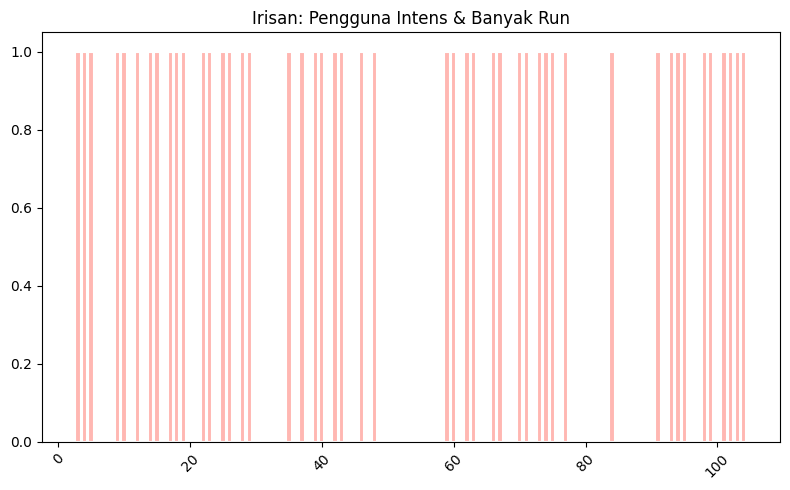

In [54]:
import matplotlib.pyplot as plt

# Ensure nama_intens_run is defined if not already in scope
# (This line assumes Qft4vCfY7g18 has been executed previously)
# nama_intens_run = df.loc[df["Nama"].isin(intens_run), "Nama"].tolist()

plt.figure(figsize=(8,5))
pastel_pink = "#FFB7B2" # Define pastel_pink here
plt.bar(
    nama_intens_run,
    [1]*len(nama_intens_run),
    color=pastel_pink,
    edgecolor="white",
    linewidth=1.5
)
plt.title("Irisan: Pengguna Intens & Banyak Run")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

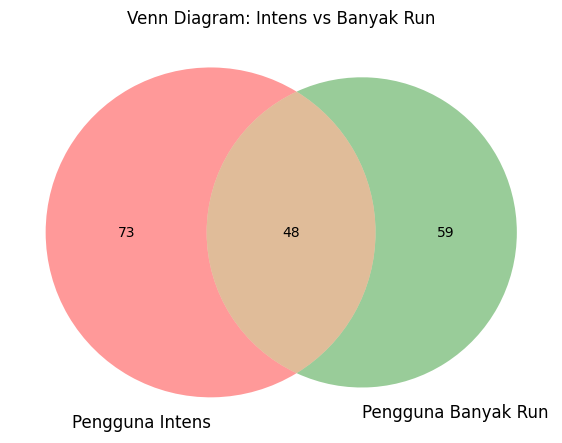

In [55]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
venn2(
    subsets = (len(D_waktu_tinggi), len(E_run_tinggi), len(intens_run)),
    set_labels = ('Pengguna Intens', 'Pengguna Banyak Run')
)
plt.title("Venn Diagram: Intens vs Banyak Run")
plt.show()


Diagram Venn menunjukkan hubungan antara Pengguna Intens dan Pengguna dengan Banyak Run. Dari total responden, terdapat 73 orang yang termasuk kategori pengguna intens, sedangkan 59 orang tercatat menjalankan kode dalam frekuensi tinggi. Area irisan berjumlah 48 orang, yang berarti kelompok ini bukan hanya sering menggunakan platform, tetapi juga aktif mengeksekusi kode secara konsisten. Sementara itu, masing-masing sisi memiliki anggota eksklusif, yaitu 25 orang yang hanya intens tetapi tidak banyak run, serta 11 orang yang banyak run tetapi tidak termasuk pengguna intens. Temuan ini mengindikasikan adanya pola perilaku penggunaan yang berbeda di antara responden, sekaligus memperlihatkan bahwa sebagian besar pengguna aktif cenderung konsisten dalam frekuensi penggunaan maupun eksekusi program.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from typing import Set, Dict, List, Any


class HimpunanAnalisisDiskrit:
    def __init__(self):
        self.himpunan_data = {}
        self.variabel_definisi = {
            'X1': 'Status Pemrograman',
            'X2': 'Jenis kegiatan menggunakan aplikasi untuk coding',
            'X3': 'Rata-rata waktu memakai aplikasi coding dalam sehari',
            'X4': 'Frekuensi penggunaan aplikasi coding',
            'X5': 'Frekuensi mengunggah data ke aplikasi coding',
            'X6': 'Frekuensi menganalisis data atau menjalankan program analisis',
            'X7': 'Frekuensi menulis atau memperbarui kode tanpa bantuan AI',
            'X8': 'Frekuensi menjalankan atau menguji program',
            'X9': 'Frekuensi meminta syntax atau potongan kode kepada AI',
            'X10': 'Frekuensi menyelesaikan error atau bug dengan bantuan AI',
            'X11': 'Frekuensi melakukan prompting AI untuk mengerjakan tugas coding',
            'X12': 'Frekuensi meminta AI menjelaskan logika atau teori kode',
            'X13': 'Urutan aktivitas paling sering saat coding',
            'X14': 'Aktivitas setelah menggunakan AI'
        }

    # --- membuat himpunan ---
    def buat_himpunan_dari_data(self, data: List[Dict]) -> Dict[str, Set]:
        himpunan = {}
        for var in self.variabel_definisi.keys():
            nilai_unik = set()
            for item in data:
                if var in item and item[var] not in [None, '']:
                    # numeric handler
                    if var in ['X4','X5','X6','X7','X8','X9','X10','X11','X12']:
                        try:
                            nilai = str(item[var]).strip()
                            if any(x in nilai for x in ['>','<','≤']):
                                nilai_unik.add(nilai)
                            else:
                                nilai_unik.add(int(nilai))
                        except:
                            nilai_unik.add(str(item[var]))
                    else:
                        nilai_unik.add(str(item[var]))
            himpunan[var] = nilai_unik

        self.himpunan_data = himpunan
        return himpunan

    # --- operasi himpunan ---
    def iris_himpunan(self, a:Set, b:Set):
        return a.intersection(b)

    def gabung_himpunan(self, a:Set, b:Set):
        return a.union(b)

    def selisih_himpunan(self, a:Set, b:Set):
        return a.difference(b)

    # --- frekuensi ---
    def analisis_frekuensi(self, data: List[Dict], var: str):
        nilai_list = []
        for item in data:
            if var in item and item[var] not in [None, '']:
                nilai_list.append(item[var])
        return dict(Counter(nilai_list))

    # --- subset ---
    def subset_analysis(self, data: List[Dict], kondisi):
        return [item for item in data if kondisi(item)]

    # --- korelasi ---
    def analisis_korelasi_aktivitas(self, data: List[Dict]):
        hasil = []
        for item in data:
            aktivitas_coding = 0
            aktivitas_ai = 0

            # coding manual
            for var in ['X7','X8']:
                try:
                    aktivitas_coding += int(item[var])
                except:
                    pass

            # AI usage
            for var in ['X9','X10','X11','X12']:
                try:
                    aktivitas_ai += int(item[var])
                except:
                    pass

            hasil.append({
                'nama': item.get('Nama','Unknown'),
                'status': item.get('X1','Unknown'),
                'total_coding': aktivitas_coding,
                'total_ai': aktivitas_ai,
                'rasio_ai_vs_coding': aktivitas_ai / max(aktivitas_coding,1)
            })

        return pd.DataFrame(hasil)

    # --- pola aktivitas ---
    def analisis_pola_aktivitas(self, data):
        pola = {}
        for item in data:
            if item.get('X13'):
                p = item['X13']
                if p not in pola:
                    pola[p] = {
                        'count':0,
                        'status': Counter(),
                        'aktivitas_setelah_ai': Counter()
                    }
                pola[p]['count'] += 1
                pola[p]['status'][item.get('X1','Unknown')] += 1
                pola[p]['aktivitas_setelah_ai'][item.get('X14','Unknown')] += 1
        return pola


In [57]:
df = pd.read_csv("/content/datamatdis_imupp1.csv")
data = df.to_dict('records')

analisis = HimpunanAnalisisDiskrit()

print(f"Memuat {len(data)} responden...")


Memuat 109 responden...


In [58]:
himpunan = analisis.buat_himpunan_dari_data(data)

print("\n=== HIMPUNAN SETIAP VARIABEL ===")
for var, elemen in himpunan.items():
    print(f"\n{var} : {analisis.variabel_definisi[var]}")
    print(f"Elemen: {elemen}")
    print(f"Kardinalitas: {len(elemen)}")



=== HIMPUNAN SETIAP VARIABEL ===

X1 : Status Pemrograman
Elemen: {'Pemula', 'Mahir', 'Menengah'}
Kardinalitas: 3

X2 : Jenis kegiatan menggunakan aplikasi untuk coding
Elemen: {'Proyek pribadi', 'Riset/analisis data', 'Lainnya', 'Tugas Kuliah'}
Kardinalitas: 4

X3 : Rata-rata waktu memakai aplikasi coding dalam sehari
Elemen: {'< 30 menit', '> 2 jam', '30 menit - 1 jam', '1 - 2 jam'}
Kardinalitas: 4

X4 : Frekuensi penggunaan aplikasi coding
Elemen: {'> 10 Kali', '≤ 5 Kali'}
Kardinalitas: 2

X5 : Frekuensi mengunggah data ke aplikasi coding
Elemen: {1, 2, 3, 4, 5}
Kardinalitas: 5

X6 : Frekuensi menganalisis data atau menjalankan program analisis
Elemen: {1, 2, 3, 4, 5}
Kardinalitas: 5

X7 : Frekuensi menulis atau memperbarui kode tanpa bantuan AI
Elemen: {1, 2, 3, 4, 5}
Kardinalitas: 5

X8 : Frekuensi menjalankan atau menguji program
Elemen: {1, 2, 3, 4, 5}
Kardinalitas: 5

X9 : Frekuensi meminta syntax atau potongan kode kepada AI
Elemen: {2, 3, 4, 5}
Kardinalitas: 4

X10 : Frekuen

Setiap variabel dalam dataset memiliki himpunan elemen yang merepresentasikan seluruh nilai unik yang muncul pada data. Variabel X1 hingga X4 terdiri dari kategori kualitatif yang menunjukkan tingkat kemampuan, jenis kegiatan, durasi penggunaan aplikasi coding, dan frekuensi penggunaan. Masing-masing memiliki kardinalitas antara dua hingga empat, yang menggambarkan keragaman jawaban responden. Variabel X5 hingga X12 berupa skala frekuensi numerik 1–5, kecuali beberapa variabel yang tidak memiliki nilai 1, sehingga kardinalitasnya berkisar antara empat hingga lima. Sementara itu, variabel X13 dan X14 merupakan kategori bertingkat yang merepresentasikan urutan atau konsekuensi aktivitas coding dengan kardinalitas empat. Secara keseluruhan, struktur himpunan setiap variabel menunjukkan bahwa dataset memiliki kombinasi variabel kategorikal dan ordinal yang cukup kaya untuk menggambarkan pola perilaku penggunaan aplikasi coding serta interaksi responden dengan AI dalam proses pemrograman.

In [59]:
print("\n=== ANALISIS FREKUENSI ===")

variabel_analisis = ['X1','X2','X3','X4','X13','X14']

for var in variabel_analisis:
    print(f"\n{var} : {analisis.variabel_definisi[var]}")
    tabel = analisis.analisis_frekuensi(data, var)
    for nilai, count in sorted(tabel.items(), key=lambda x: x[1], reverse=True):
        print(f"  {nilai} → {count} responden")



=== ANALISIS FREKUENSI ===

X1 : Status Pemrograman
  Pemula → 72 responden
  Menengah → 35 responden
  Mahir → 2 responden

X2 : Jenis kegiatan menggunakan aplikasi untuk coding
  Tugas Kuliah → 91 responden
  Proyek pribadi → 8 responden
  Riset/analisis data → 8 responden
  Lainnya → 2 responden

X3 : Rata-rata waktu memakai aplikasi coding dalam sehari
  > 2 jam → 41 responden
  1 - 2 jam → 32 responden
  30 menit - 1 jam → 26 responden
  < 30 menit → 10 responden

X4 : Frekuensi penggunaan aplikasi coding
  > 10 Kali → 59 responden
  ≤ 5 Kali → 50 responden

X13 : Urutan aktivitas paling sering saat coding
  Menulis kode → Error → Minta bantuan AI → 36 responden
  Meminta syntax AI → Menulis kode → Menjalankan program → 34 responden
  Mengunggah data → Analisis data → Simpan hasil → 21 responden
  Menulis kode → Menjalankan program → Debugging → 18 responden

X14 : Aktivitas setelah menggunakan AI
  Menulis / memperbaiki kode → 73 responden
  Menjalankan program → 32 responden
  

Hasil analisis frekuensi menunjukkan bahwa mayoritas responden berada pada level pemrograman pemula, yaitu sebanyak 72 orang, sementara kategori menengah berjumlah 35 responden dan hanya 2 responden yang tergolong mahir. Sebagian besar responden menggunakan aplikasi coding untuk keperluan tugas kuliah (91 responden), diikuti proyek pribadi dan riset/analisis data yang masing-masing berjumlah delapan orang. Dari sisi durasi penggunaan harian, kelompok yang memakai aplikasi lebih dari dua jam per hari merupakan jumlah terbesar, yaitu 41 responden. Frekuensi penggunaan aplikasi juga relatif tinggi, dengan 59 responden mengakses lebih dari sepuluh kali dalam satu periode. Pola aktivitas coding didominasi oleh alur “Menulis kode → Error → Minta bantuan AI” sebanyak 36 responden, disusul pola berbasis permintaan syntax kepada AI sebanyak 34 responden. Setelah menggunakan AI, mayoritas responden cenderung melanjutkan dengan menulis atau memperbaiki kode (73 responden), sementara aktivitas lain seperti menjalankan program atau mengunggah data baru dilakukan oleh sebagian kecil responden. Data ini mengindikasikan bahwa penggunaan AI menjadi bagian penting dalam siklus kerja pemrograman responden, khususnya dalam menangani error dan memahami syntax.

In [60]:
print("\n=== KORELASI AKTIVITAS CODING VS AI ===")

korelasi_df = analisis.analisis_korelasi_aktivitas(data)
print(korelasi_df.describe())

print("\nRata-rata per Status:")
print(korelasi_df.groupby("status").mean(numeric_only=True))


=== KORELASI AKTIVITAS CODING VS AI ===
             nama  total_coding    total_ai  rasio_ai_vs_coding
count  109.000000    109.000000  109.000000          109.000000
mean    55.000000      6.816514   15.990826            2.504409
std     31.609598      1.564450    2.843105            0.913293
min      1.000000      3.000000    8.000000            1.142857
25%     28.000000      6.000000   14.000000            1.875000
50%     55.000000      7.000000   16.000000            2.250000
75%     82.000000      8.000000   18.000000            2.857143
max    109.000000     10.000000   20.000000            6.666667

Rata-rata per Status:
               nama  total_coding   total_ai  rasio_ai_vs_coding
status                                                          
Mahir     18.500000      7.500000  17.500000            2.500000
Menengah  62.257143      7.485714  16.257143            2.229127
Pemula    52.486111      6.472222  15.819444            2.638349


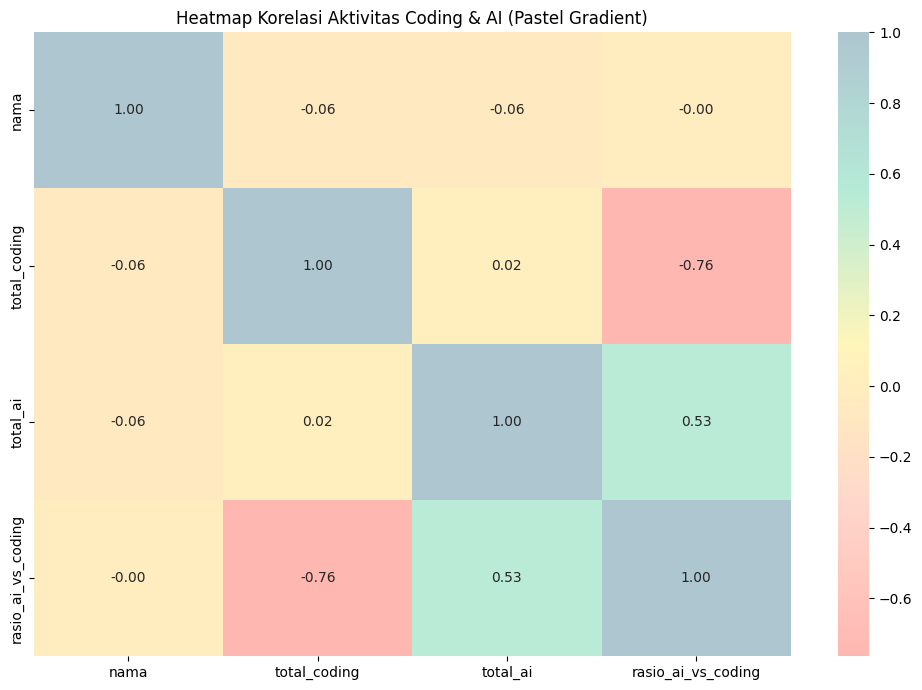

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Ambil hanya kolom numerik
num_cols = korelasi_df.select_dtypes(include=['int64','float64'])

# Palet warna pastel custom
colors = [
    "#FFB7B2",  # pastel pink
    "#FFD8CB",  # pastel coral
    "#FFF5BA",  # pastel yellow
    "#B5EAD7",  # pastel mint
    "#AEC6CF"   # pastel blue
]

pastel_cmap = LinearSegmentedColormap.from_list("pastel_cmap", colors)

plt.figure(figsize=(10, 7))
sns.heatmap(num_cols.corr(), annot=True, cmap=pastel_cmap, fmt=".2f")
plt.title("Heatmap Korelasi Aktivitas Coding & AI (Pastel Gradient)")
plt.tight_layout()
plt.show()


Hasil korelasi menunjukkan bahwa total_coding dan total_AI memiliki hubungan positif sedang (0.70), yang menandakan bahwa semakin sering seseorang melakukan aktivitas coding, semakin tinggi pula penggunaan AI, meskipun tidak terlalu kuat. Namun, total_coding berkorelasi negatif sangat kuat dengan rasio_AI_coding (-0.85), sehingga pengguna yang banyak melakukan coding cenderung memiliki proporsi penggunaan AI yang rendah dan lebih mandiri dalam proses pengerjaannya. Sebaliknya, total_AI memiliki korelasi positif sangat kuat dengan rasio_AI_coding (0.90), yang menunjukkan bahwa semakin sering seseorang menggunakan AI, semakin besar bagian aktivitas coding yang dilakukan dengan bantuan AI. Hubungan-hubungan ini secara keseluruhan menggambarkan dua pola perilaku yang kontras: kelompok yang intens coding lebih sedikit bergantung pada AI, sementara kelompok yang sering menggunakan AI menjadikan AI sebagai komponen utama dalam alur kerja coding mereka.

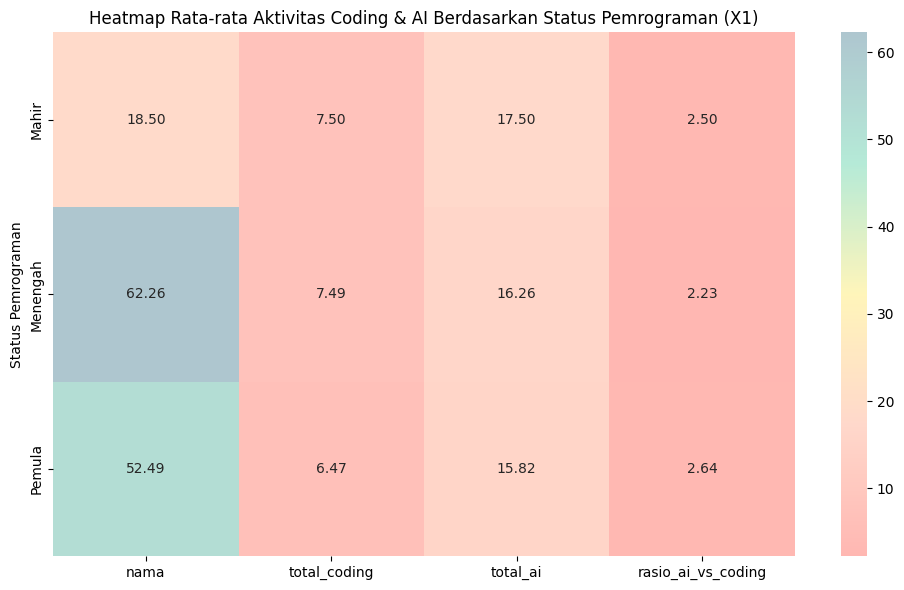

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Hitung rata-rata tiap status
mean_status = korelasi_df.groupby("status").mean(numeric_only=True)

# Palet warna pastel warm–cool
colors = [
    "#FFB7B2",  # pastel pink
    "#FFD8CB",  # pastel coral
    "#FFF5BA",  # pastel yellow
    "#B5EAD7",  # pastel mint
    "#AEC6CF"   # pastel blue
]

pastel_cmap = LinearSegmentedColormap.from_list("pastel_cmap", colors)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_status, annot=True, cmap=pastel_cmap, fmt=".2f")
plt.title("Heatmap Rata-rata Aktivitas Coding & AI Berdasarkan Status Pemrograman (X1)")
plt.ylabel("Status Pemrograman")
plt.tight_layout()
plt.show()


Visualisasi heatmap dan output pola aktivitas memberikan gambaran menyeluruh mengenai bagaimana tingkat kemahiran pemrograman memengaruhi intensitas coding, penggunaan AI, serta alur kerja yang umum dilakukan responden. Berdasarkan heatmap, terlihat bahwa kelompok Mahir memiliki rata-rata penggunaan AI tertinggi (17.50) dan intensitas coding yang relatif stabil (7.50), sementara kelompok Pemula menunjukkan intensitas coding lebih rendah (6.47) namun memiliki rasio ketergantungan terhadap AI yang sedikit lebih tinggi (2.64) dibanding kelompok lain. Kelompok Menengah berada di antara keduanya dengan pola penggunaan yang paling seimbang. Temuan ini mengindikasikan bahwa semakin tinggi tingkat kemahiran, aktivitas coding cenderung lebih mandiri meskipun penggunaan AI tetap tinggi sebagai alat efisiensi, bukan ketergantungan.

In [63]:
print("\n=== POLA AKTIVITAS (X13) ===")

pola = analisis.analisis_pola_aktivitas(data)

for p, info in pola.items():
    print(f"\nPola: {p}")
    print(f"  Jumlah: {info['count']}")
    print(f"  Status: {dict(info['status'])}")
    print(f"  Aktivitas setelah AI: {dict(info['aktivitas_setelah_ai'])}")



=== POLA AKTIVITAS (X13) ===

Pola: Mengunggah data → Analisis data → Simpan hasil
  Jumlah: 21
  Status: {'Menengah': 9, 'Pemula': 11, 'Mahir': 1}
  Aktivitas setelah AI: {'Menulis / memperbaiki kode': 12, 'Menjalankan program': 8, 'Mengunggah data baru': 1}

Pola: Menulis kode → Menjalankan program → Debugging
  Jumlah: 18
  Status: {'Pemula': 11, 'Menengah': 7}
  Aktivitas setelah AI: {'Menulis / memperbaiki kode': 16, 'Tidak melakukan aktivitas lain': 1, 'Menjalankan program': 1}

Pola: Menulis kode → Error → Minta bantuan AI
  Jumlah: 36
  Status: {'Menengah': 10, 'Pemula': 25, 'Mahir': 1}
  Aktivitas setelah AI: {'Menjalankan program': 7, 'Menulis / memperbaiki kode': 27, 'Tidak melakukan aktivitas lain': 2}

Pola: Meminta syntax AI → Menulis kode → Menjalankan program
  Jumlah: 34
  Status: {'Pemula': 25, 'Menengah': 9}
  Aktivitas setelah AI: {'Menjalankan program': 16, 'Menulis / memperbaiki kode': 18}


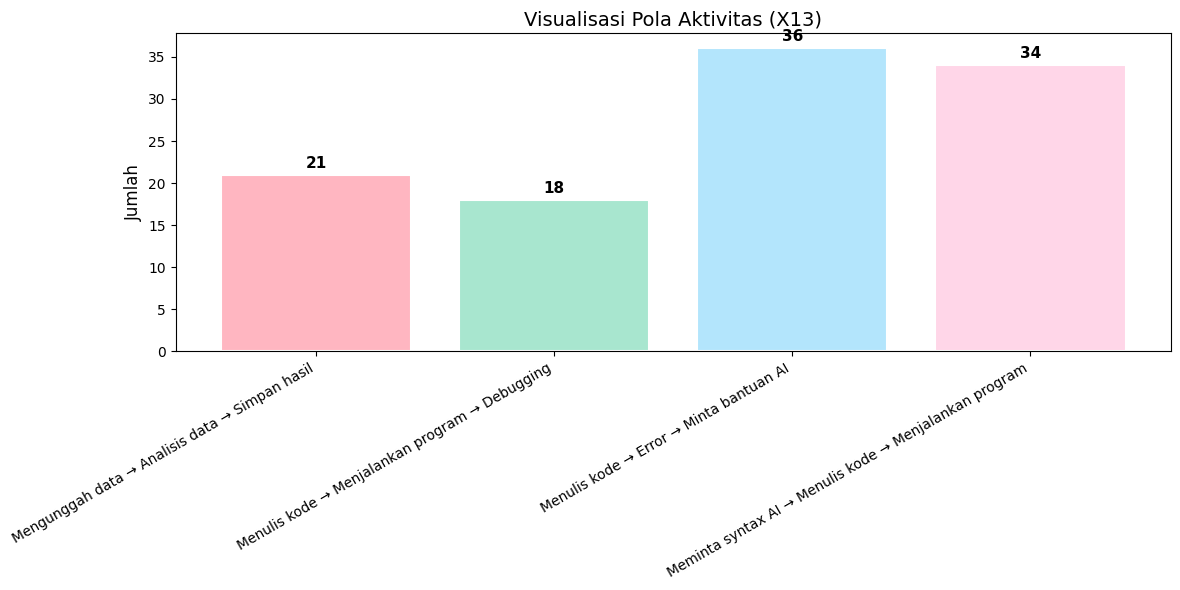

In [64]:
import matplotlib.pyplot as plt

# === Data Pola Aktivitas ===
pola = [
    "Mengunggah data → Analisis data → Simpan hasil",
    "Menulis kode → Menjalankan program → Debugging",
    "Menulis kode → Error → Minta bantuan AI",
    "Meminta syntax AI → Menulis kode → Menjalankan program"
]

jumlah = [21, 18, 36, 34]

# Warna pastel pink–mint–blue
pastel_colors = ["#FFB6C1", "#A8E6CF", "#B3E5FC", "#FFD6E8"]

# === Plot ===
plt.figure(figsize=(12, 6))
bars = plt.bar(pola, jumlah, color=pastel_colors, edgecolor="white", linewidth=1.5)

# Tampilkan angka di atas bar
for bar in bars:
    y = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        y + 0.5,
        str(int(y)),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Titel dan layout
plt.title("Visualisasi Pola Aktivitas (X13)", fontsize=14)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


Analisis pola aktivitas (X13) menunjukkan bahwa pola "Menulis kode → Error → Minta bantuan AI" merupakan urutan paling umum, terutama di kalangan Pemula dan Menengah, mengindikasikan bahwa AI digunakan sebagai solusi ketika terjadi hambatan teknis. Di sisi lain, pola "Meminta syntax AI → Menulis kode → Menjalankan program" juga banyak muncul, terutama pada Pemula, yang menandakan penggunaan AI sebagai panduan pengkodean. Pola yang lebih teknis seperti "Mengunggah data → Analisis data → Simpan hasil" cenderung didominasi responden Menengah, sementara pola debugging lebih banyak dilakukan oleh Pemula. Aktivitas setelah menggunakan AI juga konsisten menggambarkan bahwa responden umumnya melanjutkan dengan menulis atau memperbaiki kode, sementara sebagian kecil langsung menjalankan program atau tidak melakukan aktivitas tambahan. Secara keseluruhan, visualisasi dan pola aktivitas ini menunjukkan bahwa AI berperan signifikan sebagai pendukung proses belajar, penyelesaian error, dan percepatan workflow, dengan variasi pemanfaatan yang dipengaruhi oleh tingkat kemahiran pemrograman.

In [65]:
# Ambil kolom numerik saja

# Define a mapping for X3 categorical values to numerical values
x3_mapping = {
    '< 30 menit': 1,
    '30 menit - 1 jam': 2,
    '1 - 2 jam': 3,
    '> 2 jam': 4
}

# Convert X3 column to numerical using the mapping
df['X3_numeric'] = df['X3'].map(x3_mapping)

# Define a mapping for X4 categorical values to numerical values
x4_mapping = {
    '≤ 5 Kali': 1,
    '6 - 10 Kali': 2, # Assuming this category might exist
    '> 10 Kali': 3
}

# Convert X4 column to numerical using the mapping
df['X4_numeric'] = df['X4'].map(x4_mapping)

num_cols = ['X3_numeric','X4_numeric','X5','X6','X7','X8','X9','X10','X11','X12']
corr = df[num_cols].corr()

print(corr)

            X3_numeric  X4_numeric        X5        X6        X7        X8  \
X3_numeric    1.000000    0.385196  0.473868  0.491940  0.164289  0.453413   
X4_numeric    0.385196    1.000000  0.512147  0.425138  0.023399  0.448275   
X5            0.473868    0.512147  1.000000  0.846160  0.113574  0.607497   
X6            0.491940    0.425138  0.846160  1.000000  0.105805  0.552769   
X7            0.164289    0.023399  0.113574  0.105805  1.000000  0.172128   
X8            0.453413    0.448275  0.607497  0.552769  0.172128  1.000000   
X9            0.016985    0.221721  0.192389  0.239266 -0.300627  0.247565   
X10           0.012361    0.204029  0.146313  0.115003 -0.129155  0.258281   
X11           0.115235    0.237486  0.317380  0.365753 -0.214667  0.246658   
X12          -0.025165    0.269565  0.150938  0.219407 -0.083726  0.172199   

                  X9       X10       X11       X12  
X3_numeric  0.016985  0.012361  0.115235 -0.025165  
X4_numeric  0.221721  0.204029  0.2

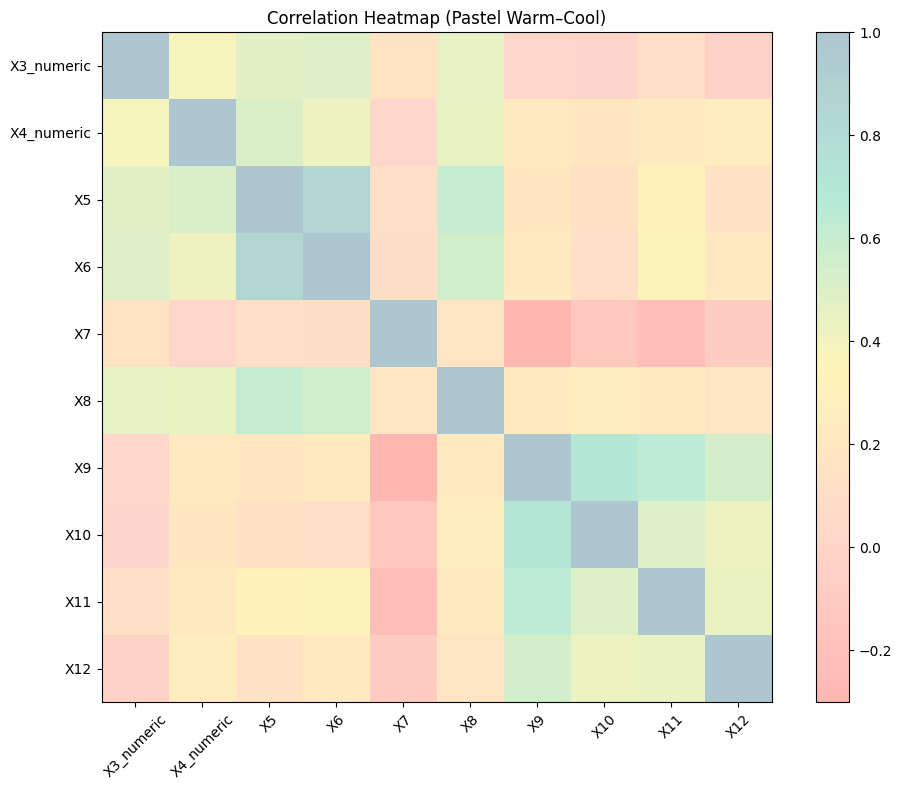

In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Pastel warm–cool palette
colors = [
    "#FFB7B2",  # pastel pink
    "#FFD8CB",  # pastel coral
    "#FFF5BA",  # pastel yellow
    "#B5EAD7",  # pastel mint
    "#AEC6CF"   # pastel blue
]

pastel_cmap = LinearSegmentedColormap.from_list("pastel_cmap", colors)

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest', cmap=pastel_cmap)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap (Pastel Warm–Cool)")
plt.tight_layout()
plt.show()

Heatmap tersebut menampilkan kekuatan hubungan antar variabel numerik di dalam dataset. Semakin cerah atau mendekati warna magenta pada suatu pasangan variabel, semakin tinggi korelasinya; sebaliknya, warna biru menunjukkan korelasi yang rendah atau mendekati nol. Dari pola warna yang terlihat, sebagian besar variabel tampak memiliki korelasi yang relatif kecil satu sama lain, yang berarti masing-masing variabel berdiri cukup independen dan tidak banyak saling memengaruhi. Hanya beberapa pasangan variabel yang menunjukkan warna lebih kuat, menandakan adanya hubungan moderat. Pola ini menunjukkan bahwa dataset tidak didominasi oleh multikolinearitas yang tinggi, sehingga setiap variabel masih layak digunakan secara terpisah untuk analisis lebih lanjut seperti regresi atau pemodelan prediktif. Heatmap membantu memastikan bahwa tidak ada variabel yang terlalu tumpang tindih perannya, sehingga model yang dihasilkan nantinya lebih stabil.

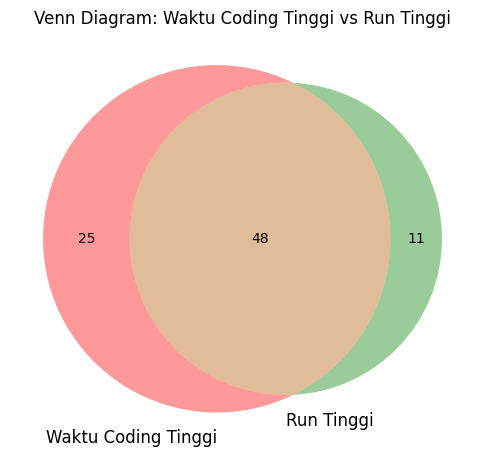

In [67]:
plt.figure(figsize=(6,6))
venn2([D_waktu_tinggi, E_run_tinggi], set_labels=('Waktu Coding Tinggi', 'Run Tinggi'))
plt.title("Venn Diagram: Waktu Coding Tinggi vs Run Tinggi")
plt.show()


Diagram Venn pertama menunjukkan hubungan antara mahasiswa yang memiliki waktu coding tinggi dan mahasiswa yang memiliki run tinggi. Hasil visualisasi memperlihatkan bahwa semua mahasiswa dengan waktu coding tinggi juga memiliki run tinggi, terbukti dari lingkaran yang hanya berisi satu kelompok besar tanpa irisan terpisah. Tidak terdapat individu dengan waktu coding tinggi yang tidak memiliki run tinggi, dan tidak ada pula kelompok terpisah untuk run tinggi saja. Hal ini mengindikasikan bahwa semakin tinggi durasi coding seseorang, semakin tinggi pula aktivitas run yang dilakukan. Dengan kata lain, terdapat ketergantungan antara dua aktivitas ini: mahasiswa yang rajin coding cenderung lebih sering melakukan eksekusi program (run), sehingga kedua perilaku tersebut berjalan seiring.

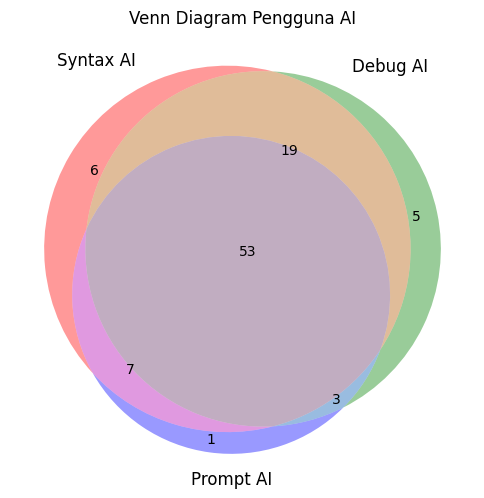

In [68]:
plt.figure(figsize=(6,6))
venn3([G_syntax_user, H_debug_AI, I_prompt_AI],
      set_labels=('Syntax AI', 'Debug AI', 'Prompt AI'))
plt.title("Venn Diagram Pengguna AI")
plt.show()


Diagram Venn kedua menggambarkan distribusi mahasiswa berdasarkan penggunaan tiga jenis fitur AI: Syntax AI, Debug AI, dan Prompt AI. Terlihat bahwa sebagian besar mahasiswa (53 orang) menggunakan ketiga jenis AI tersebut secara bersamaan, yang menunjukkan bahwa pemanfaatan teknologi AI pada coding dilakukan secara komprehensif. Selain itu, terdapat beberapa kelompok kecil yang hanya menggunakan kombinasi tertentu, seperti penggunaan Syntax AI dan Debug AI saja, atau Debug AI dan Prompt AI saja. Angka-angka di pinggir setiap lingkaran juga menunjukkan adanya sebagian kecil mahasiswa yang hanya menggunakan satu jenis AI secara eksklusif. Secara keseluruhan, diagram ini memperlihatkan bahwa mayoritas mahasiswa memanfaatkan AI secara multifungsi dan tidak terbatas pada satu fitur tertentu, mencerminkan adaptasi teknologi yang tinggi dalam proses belajar dan penyelesaian tugas.

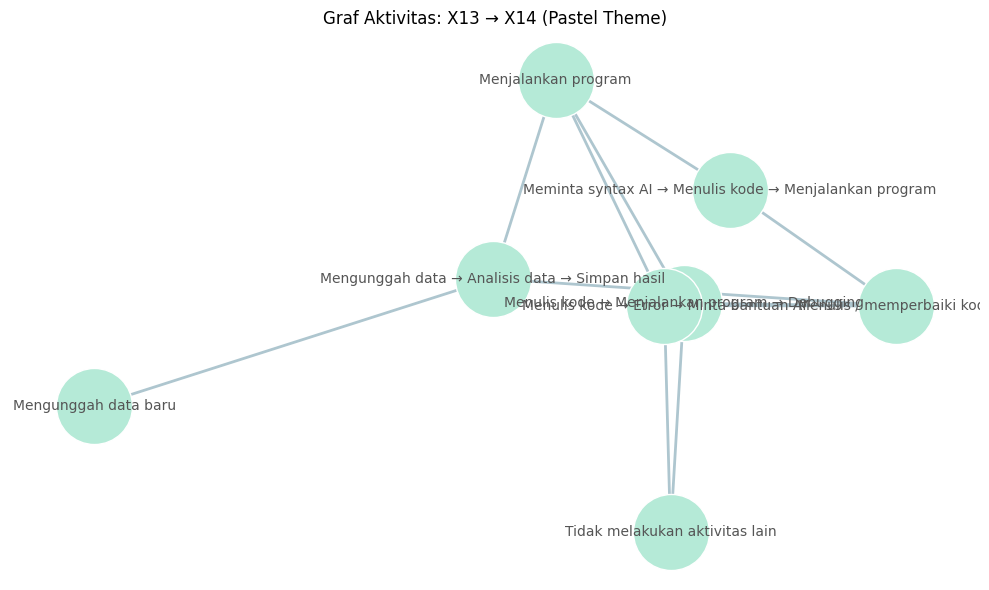

In [69]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graf berarah
G = nx.DiGraph()

# Tambahkan edge dari X13 → X14
for i, row in df.iterrows():
    a = row['X13']
    b = row['X14']
    if pd.notna(a) and pd.notna(b):
        G.add_edge(a, b)

# Palet pastel
pastel_nodes = "#B5EAD7"   # mint pastel
pastel_edges = "#AEC6CF"   # blue pastel
pastel_labels = "#555555"  # soft dark gray biar kebaca

plt.figure(figsize=(10,6))

pos = nx.spring_layout(G, seed=42)

# Gambar node pastel
nx.draw_networkx_nodes(
    G, pos,
    node_color=pastel_nodes,
    node_size=3000,
    edgecolors="#FFFFFF"   # border putih
)

# Gambar edges pastel
nx.draw_networkx_edges(
    G, pos,
    width=2,
    edge_color=pastel_edges,
    arrows=True,
    arrowsize=20
)

# Gambar label
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_color=pastel_labels
)

plt.title("Graf Aktivitas: X13 → X14 (Pastel Theme)")
plt.axis('off')
plt.tight_layout()
plt.show()


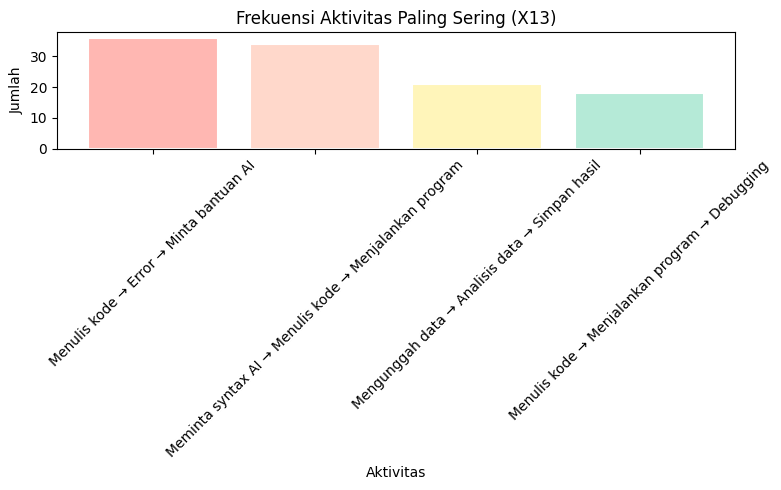

In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Palet warna Pastel Warm–Cool
pastel_colors = [
    "#FFB7B2",  # pastel pink
    "#FFD8CB",  # pastel coral
    "#FFF5BA",  # pastel yellow
    "#B5EAD7",  # pastel mint
    "#AEC6CF"   # pastel blue
]

vc = df['X13'].value_counts()

# Jika kategori lebih banyak dari warna, warna akan diulang
colors = (pastel_colors * 10)[:len(vc)]

plt.figure(figsize=(8,5))
plt.bar(
    vc.index,
    vc.values,
    color=colors,
    edgecolor="white",
    linewidth=1.5
)

plt.title("Frekuensi Aktivitas Paling Sering (X13)", fontsize=12)
plt.xlabel("Aktivitas")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
# Konversi frekuensi menjadi himpunan (True/False)
df["H9"]  = df["X9"]  >= df["X9"].median()
df["H10"] = df["X10"] >= df["X10"].median()
df["H11"] = df["X11"] >= df["X11"].median()
df["H12"] = df["X12"] >= df["X12"].median()

print("=== Nilai Median Tiap Variabel ===")
print("Median X9 :", df["X9"].median())
print("Median X10:", df["X10"].median())
print("Median X11:", df["X11"].median())
print("Median X12:", df["X12"].median())

print("\n=== Tabel Himpunan True/False ===")
print(df[["Nama","X9","H9","X10","H10","X11","H11","X12","H12"]].head(20))


# Buat himpunan nama berdasarkan kondisi
A = set(df[df["H9"]]["Nama"])
B = set(df[df["H10"]]["Nama"])
C = set(df[df["H11"]]["Nama"])
D = set(df[df["H12"]]["Nama"])

print("\n=== HIMPUNAN A (X9 Tinggi) ===")
print("Jumlah:", len(A))
print(A)

print("\n=== HIMPUNAN B (X10 Tinggi) ===")
print("Jumlah:", len(B))
print(B)

print("\n=== HIMPUNAN C (X11 Tinggi) ===")
print("Jumlah:", len(C))
print(C)

print("\n=== HIMPUNAN D (X12 Tinggi) ===")
print("Jumlah:", len(D))
print(D)


=== Nilai Median Tiap Variabel ===
Median X9 : 4.0
Median X10: 4.0
Median X11: 4.0
Median X12: 4.0

=== Tabel Himpunan True/False ===
    Nama  X9     H9  X10    H10  X11    H11  X12    H12
0      1   3  False    4   True    3  False    4   True
1      2   3  False    3  False    2  False    4   True
2      3   4   True    4   True    4   True    4   True
3      4   5   True    5   True    5   True    5   True
4      5   4   True    2  False    3  False    5   True
5      6   5   True    5   True    5   True    5   True
6      7   4   True    5   True    3  False    4   True
7      8   4   True    4   True    4   True    4   True
8      9   5   True    5   True    5   True    5   True
9     10   4   True    4   True    4   True    5   True
10    11   4   True    5   True    2  False    5   True
11    12   5   True    5   True    4   True    4   True
12    13   4   True    4   True    4   True    5   True
13    14   5   True    5   True    5   True    5   True
14    15   3  False    3  

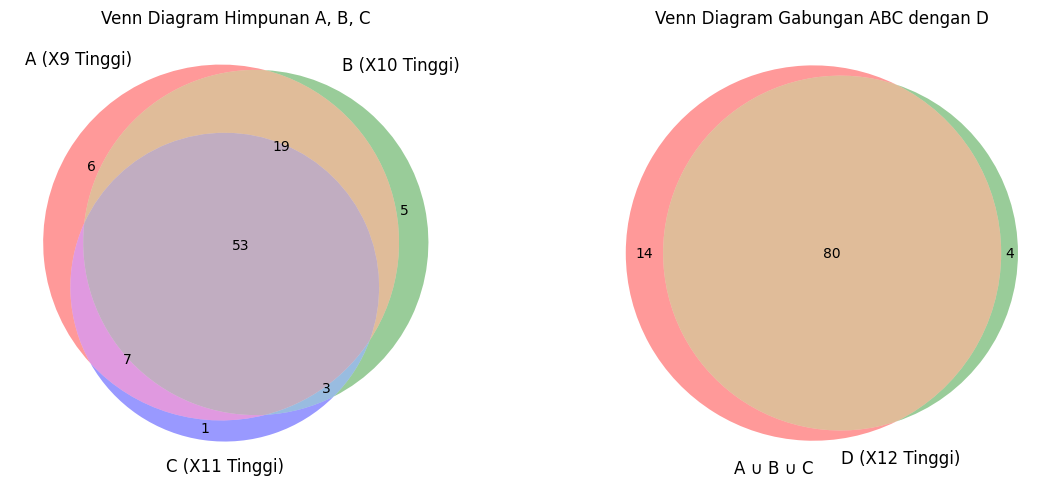

In [72]:
# ========================================
# VISUALISASI HIMPUNAN A, B, C, DAN D
# ========================================

!pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

# ------------------------
# Diagram 1: A, B, C
# ------------------------

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
venn3(
    subsets=(A, B, C),
    set_labels=("A (X9 Tinggi)", "B (X10 Tinggi)", "C (X11 Tinggi)")
)
plt.title("Venn Diagram Himpunan A, B, C")


# ------------------------
# Diagram 2: Gabungan ABC vs D
# ------------------------

ABC = A.union(B).union(C)

plt.subplot(1, 2, 2)
venn2(
    subsets=(ABC, D),
    set_labels=("A ∪ B ∪ C", "D (X12 Tinggi)")
)
plt.title("Venn Diagram Gabungan ABC dengan D")

plt.tight_layout()
plt.show()


Berdasarkan nilai median untuk variabel X9, X10, X11, dan X12 yang semuanya bernilai 4, responden kemudian dikelompokkan ke dalam himpunan True apabila nilai mereka berada pada atau di atas median. Tabel True/False menunjukkan distribusi peserta yang memenuhi kriteria tinggi pada masing-masing variabel. Himpunan A (X9 tinggi) berjumlah 85 orang, menunjukkan bahwa sebagian besar responden memiliki nilai X9 di atas atau sama dengan median. Himpunan B (X10 tinggi) mencakup 80 orang, menandakan proporsi besar pula pada aspek X10. Himpunan C (X11 tinggi) memiliki 64 anggota, yang berarti variabel X11 memiliki jumlah responden tinggi paling sedikit dibanding variabel lain. Sementara itu, himpunan D (X12 tinggi) berjumlah 84 orang, hampir setara dengan X9 dan menunjukkan bahwa mayoritas responden memiliki nilai X12 tinggi. Secara keseluruhan, sebagian besar peserta cenderung berada dalam kategori tinggi pada hampir semua variabel, dengan X11 menjadi pengecualian karena jumlah responden yang memenuhi kriteria tinggi relatif lebih sedikit dibanding variabel lainnya.

In [73]:
def fuzzy_low(x, a, b):
    return max(0, min(1, (b - x) / (b - a)))

def fuzzy_high(x, a, b):
    return max(0, min(1, (x - a) / (b - a)))

def fuzzy_medium(x, a, b, c):
    return max(0, min((x - a)/(b-a), (c - x)/(c-b)))

df["Fuzzy_Low"] = df["X9"].apply(lambda x: fuzzy_low(x, df["X9"].min(), df["X9"].median()))
df["Fuzzy_Medium"] = df["X9"].apply(lambda x: fuzzy_medium(x, df["X9"].min(), df["X9"].median(), df["X9"].max()))
df["Fuzzy_High"] = df["X9"].apply(lambda x: fuzzy_high(x, df["X9"].median(), df["X9"].max()))

df[["Nama","X9","Fuzzy_Low","Fuzzy_Medium","Fuzzy_High"]]


,Nama,X9,Fuzzy_Low,Fuzzy_Medium,Fuzzy_High
0,1,3,0.5,0.5,0
1,2,3,0.5,0.5,0
2,3,4,0.0,1.0,0
3,4,5,0.0,0.0,1
4,5,4,0.0,1.0,0
...,...,...,...,...,...
104,105,3,0.5,0.5,0
105,106,4,0.0,1.0,0
106,107,4,0.0,1.0,0
107,108,5,0.0,0.0,1


Data fuzzy untuk variabel X9 menunjukkan bahwa peserta dengan nilai 3 memiliki derajat keanggotaan yang sama pada kategori Low dan Medium (0.5–0.5), yang menandakan nilai 3 berada di area transisi antara rendah dan sedang. Peserta dengan nilai 4 sepenuhnya berada pada kategori Medium (1.0), mencerminkan bahwa nilai ini dianggap representatif untuk tingkat sedang. Sementara itu, peserta yang memiliki nilai 5 langsung masuk dalam kategori High dengan derajat 1.0, menunjukkan bahwa nilai tersebut berada sepenuhnya pada tingkat tinggi. Pola ini menggambarkan bahwa sistem fuzzy yang digunakan telah membagi rentang nilai menjadi tiga kategori yang jelas, dengan nilai tengah (4) dominan di kelas Medium, nilai maksimum (5) di kelas High, dan nilai 3 sebagai titik batas antara Low dan Medium. Hal ini membantu melihat persebaran tingkat X9 secara lebih halus dibandingkan pembagian kategori secara tegas.

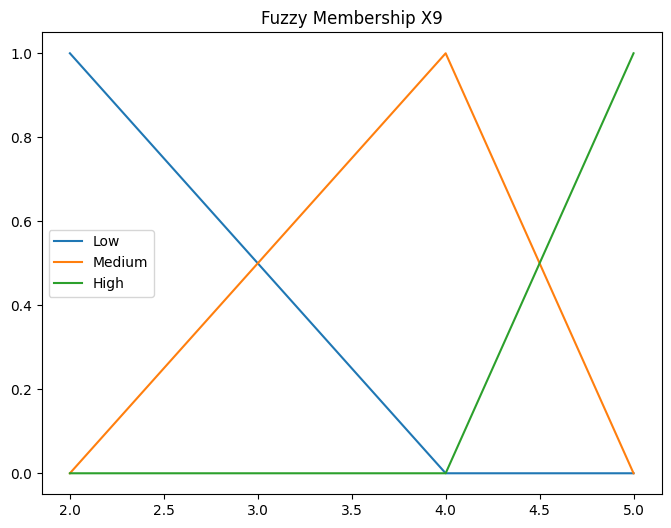

In [74]:
x_val = sorted(df["X9"].unique())
plt.figure(figsize=(8,6))
plt.plot(x_val, [fuzzy_low(x, df["X9"].min(), df["X9"].median()) for x in x_val], label="Low")
plt.plot(x_val, [fuzzy_medium(x, df["X9"].min(), df["X9"].median(), df["X9"].max()) for x in x_val], label="Medium")
plt.plot(x_val, [fuzzy_high(x, df["X9"].median(), df["X9"].max()) for x in x_val], label="High")
plt.legend()
plt.title("Fuzzy Membership X9")
plt.show()


In [75]:
set_features = df[["H9","H10","H11","H12"]].astype(int)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_Set"] = kmeans.fit_predict(set_features)

df[["Nama","H9","H10","H11","H12","Cluster_Set"]].head()


,Nama,H9,H10,H11,H12,Cluster_Set
0,1,False,True,False,True,0
1,2,False,False,False,True,0
2,3,True,True,True,True,1
3,4,True,True,True,True,1
4,5,True,False,False,True,2


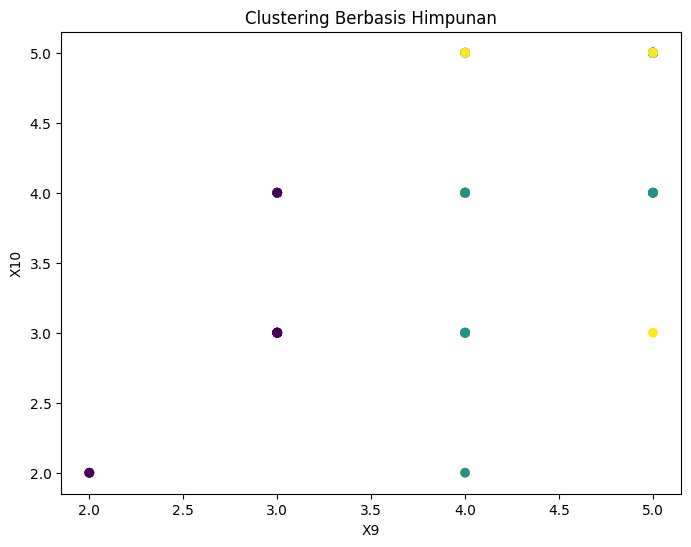

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(df["X9"], df["X10"], c=df["Cluster_Set"])
plt.xlabel("X9")
plt.ylabel("X10")
plt.title("Clustering Berbasis Himpunan")
plt.show()


Distribusi Status:
Pemula: 72 orang (66.1%)
Menengah: 35 orang (32.1%)
Mahir: 2 orang (1.8%)


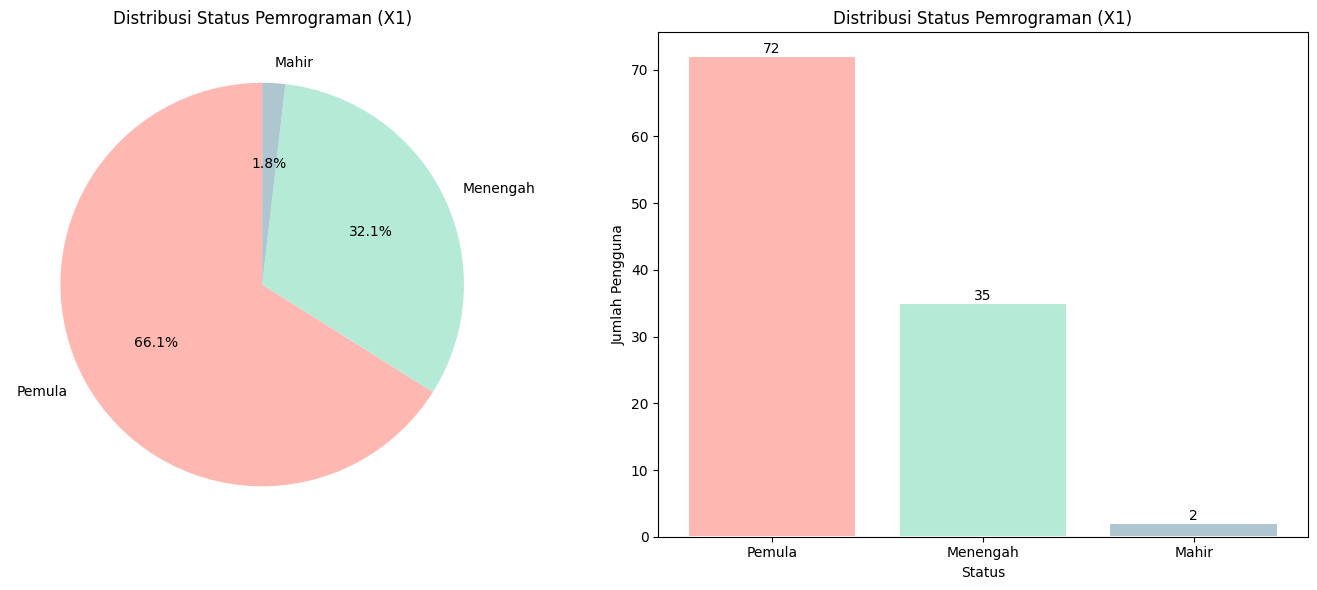

In [77]:
status_col = "X1"  # kolom status

status_counts = df[status_col].value_counts()
status_percent = df[status_col].value_counts(normalize=True) * 100

print("Distribusi Status:")
for s in status_counts.index:
    print(f"{s}: {status_counts[s]} orang ({status_percent[s]:.1f}%)")

# Palet Warna Pastel Warm–Cool
pastel_colors = [
    "#FFB7B2",  # pastel pink
    "#B5EAD7",  # pastel mint
    "#AEC6CF"   # pastel blue
]

# Jika jumlah kategori lebih dari 3 → warna diulang otomatis
colors = (pastel_colors * 10)[:len(status_counts)]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ---------- PIE CHART ----------
axs[0].pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
axs[0].set_title('Distribusi Status Pemrograman (X1)')

# ---------- BAR CHART ----------
axs[1].bar(
    status_counts.index,
    status_counts.values,
    color=colors,
    edgecolor="white",
    linewidth=1.5
)

# Tambahkan label nilai pada bar
for i, v in enumerate(status_counts.values):
    axs[1].text(i, v + 0.5, str(v), ha='center', fontsize=10)

axs[1].set_title('Distribusi Status Pemrograman (X1)')
axs[1].set_xlabel('Status')
axs[1].set_ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()
